In [92]:
import pandas as pd 
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


In [93]:
df=pd.read_csv("final_data.csv")

df_train=pd.read_csv("train_data.csv")
df_test=pd.read_csv("test_data.csv")
df_val=pd.read_csv("validation_data.csv")


In [101]:
df_train.Alfas.unique()


array([1.66, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77,
       1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88,
       1.89, 1.9 , 1.91, 1.92, 1.93])

In [170]:

def plot_emilim_values(frequencies, true_values, predicted_values,YLabel="Emilim", XLabel="Frekans", title="Gerçek ve Tahmin Edilen Emilim Değerleri"):
    """
    Frekanslara karşı gerçek ve tahmin edilen emilim değerlerini çizmek için bir fonksiyon.
    
    Parametreler:
        frequencies (array-like): X eksenindeki frekans değerleri.
        true_values (array-like): Gerçek emilim değerleri.
        predicted_values (array-like): Tahmin edilen emilim değerleri.a
        label (str): Grafiğin başlığı. (Opsiyonel; varsayılan bir başlık atanır)
    """
    # Grafik oluşturma
    plt.figure(figsize=(10, 6)) 

    # Gerçek emilim değerlerini çiz
    plt.plot(frequencies, true_values, label="Gerçek Değerler", color="green", linewidth=2)

    # Tahmin edilen emilim değerlerini çiz
    plt.plot(frequencies, predicted_values, label="Tahmin Edilen Değerler", color="red", linestyle="--", linewidth=2)

    # Grafik başlıkları ve etiketler
    plt.title(title, fontsize=16)
    plt.xlabel(XLabel, fontsize=14)
    plt.ylabel(YLabel, fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(alpha=0.3)

    # Grafik gösterimi
    plt.show()


In [105]:
new_a = 1.94
filtered_data = df_train[df_train["Alfas"] == new_a]
FrenkansnoMinMax = filtered_data["Frenkans"]

#  metot 1
- sadee frenkasn minmax yapldı polimon dercesi 2 r2 -.66 geliyor 

In [95]:
def PrepareDf(df):
    minmax=MinMaxScaler()
    minmaxed=pd.DataFrame(minmax.fit_transform(df.drop(columns=["Emilim","Alfas"])),columns=["Frenkans"])
    minmaxed["Emilim"]=df["Emilim"]
    minmaxed["Alfas"]=df["Alfas"]
    return  minmaxed

train = PrepareDf(df_train)
Train_X = train[["Alfas", "Frenkans"]]
Train_Y = train["Emilim"]

test = PrepareDf(df_test)
Test_X = test[["Alfas", "Frenkans"]]
Test_Y = test["Emilim"]

val = PrepareDf(df_val)
Val_X = val[["Alfas", "Frenkans"]]
Val_Y = val["Emilim"]




In [96]:
polynomial_degree = 2 # 2 veya 3 deneyebilirsiniz
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
model.fit(Train_X,Train_Y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [113]:
# new_a = 1.94
# filtered_data = val[val["Alfas"] == new_a]
# true_ValuesForselectedAlfas=filtered_data["Emilim"]
# Frenkans_for_only_one_Alfas = filtered_data["Frenkans"]
# lenFrenkans=len(Frenkans_for_only_one_Alfas)
# new_frequencies =  Frenkans_for_only_one_Alfas
# new_data = pd.DataFrame({'Alfas': [new_a]*lenFrenkans, 'Frenkans': new_frequencies})
# val_predictions = model.predict(new_data)

val_predictions=model.predict(Val_X)

In [114]:
# val_mse = mean_squared_error(true_ValuesForselectedAlfas, val_predictions)
# val_r2 = r2_score(true_ValuesForselectedAlfas, val_predictions)
# print(f"Validation MSE: {val_mse}")
# print(f"Validation R2: {val_r2}")

val_mse = mean_squared_error(Val_Y, val_predictions)
val_r2 = r2_score(Val_Y, val_predictions)
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")


Validation MSE: 0.012134959607659694
Validation R2: -0.6045196845406331


In [115]:
Val_Y.shape,val_predictions.shape,Val_X.shape

((3003,), (3003,), (3003, 2))

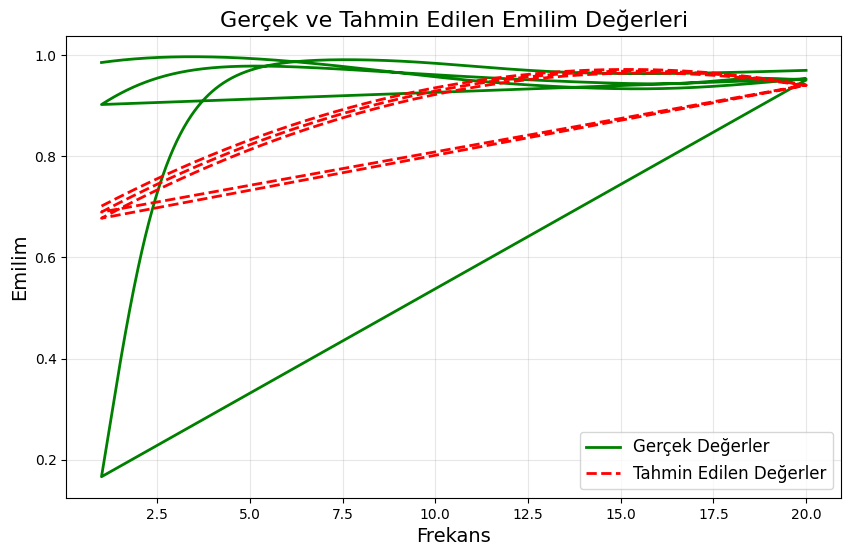

In [117]:
# plot_emilim_values(Frenkans_for_only_one_Alfas,true_ValuesForselectedAlfas,val_predictions) #tek deger icin 
plot_emilim_values(df_val["Frenkans"],Val_Y,val_predictions)

# metot 2
-  emilim haric tum datada minmax yapılır 
- tum set verdiginde r2 50 geliyır ama grafik kotu anlamsız gelior 
- tek verilerde r2 -60 geliyor ama grafik daha anlasılır ama koty yinede

In [153]:
def PrepareDf(df): #emilim haric tum datada minmax yapılır sonra ayrılır r2 %22 geldi 
    minmax=MinMaxScaler()
    alldf=pd.DataFrame(minmax.fit_transform(df.drop(columns=["Emilim"])),columns=["Alfas","Frenkans"])
    alldf["Emilim"]=df["Emilim"]
    return alldf




train = PrepareDf(df_train)
Train_X = train[["Alfas", "Frenkans"]]
Train_Y = train["Emilim"]

test = PrepareDf(df_test)
Test_X = test[["Alfas", "Frenkans"]]
Test_Y = test["Emilim"]

val = PrepareDf(df_val)
Val_X = val[["Alfas", "Frenkans"]]
Val_Y = val["Emilim"]


In [166]:
val.Alfas.unique()

array([0. , 0.5, 1. ])

In [200]:
polynomial_degree = 3 # 2 veya 3 deneyebilirsiniz
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
model.fit(Train_X,Train_Y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lin_reg', LinearRegression())])

In [201]:
new_a = 0.5
filtered_data = val[val["Alfas"] == new_a]
true_ValuesForselectedAlfas=filtered_data["Emilim"]
Frenkans_for_only_one_Alfas = filtered_data["Frenkans"]
lenFrenkans=len(Frenkans_for_only_one_Alfas)
new_frequencies =  Frenkans_for_only_one_Alfas
new_data = pd.DataFrame({'Alfas': [new_a]*lenFrenkans, 'Frenkans': new_frequencies})
val_predictions = model.predict(new_data)

# val_predictions=model.predict(Val_X)

In [202]:
val_mse = mean_squared_error(true_ValuesForselectedAlfas, val_predictions)
val_r2 = r2_score(true_ValuesForselectedAlfas, val_predictions)
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")

# val_mse = mean_squared_error(Val_Y, val_predictions)
# val_r2 = r2_score(Val_Y, val_predictions)
# print(f"Validation MSE: {val_mse}")
# print(f"Validation R2: {val_r2}")


Validation MSE: 0.001466620914261927
Validation R2: -6.240845437216103


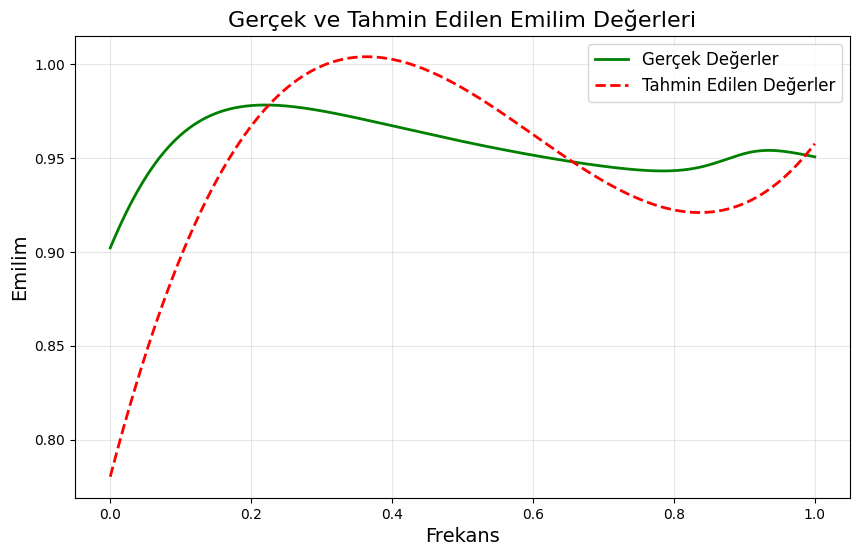

In [203]:
plot_emilim_values(Frenkans_for_only_one_Alfas,true_ValuesForselectedAlfas,val_predictions) #tek deger icin 
# plot_emilim_values(df_val["Frenkans"],Val_Y,val_predictions)

In [55]:
def PrepareDf(df):  ## boyle yapınca r2 -4 kusur geliyor alfas harıc digerelrini minmax yapınca 
    minmax=StandardScaler()
    return  pd.DataFrame(minmax.fit_transform(df),columns=["Frenkans","Emilim"])

train = PrepareDf(df_train.drop(columns=["Alfas"]))
train["Alfas"] = df_train["Alfas"]
Train_X = train[["Alfas", "Frenkans"]]
Train_Y = train["Emilim"]

test = PrepareDf(df_test.drop(columns=["Alfas"]))
test["Alfas"] = df_test["Alfas"]  # Düzeltilmiş kısım
Test_X = test[["Alfas", "Frenkans"]]
Test_Y = test["Emilim"]

val = PrepareDf(df_val.drop(columns=["Alfas"]))
val["Alfas"] = df_val["Alfas"]  # Düzeltilmiş kısım
Val_X = val[["Alfas", "Frenkans"]]
Val_Y = val["Emilim"]


In [85]:
polynomial_degree = 2 # 2 veya 3 deneyebilirsiniz
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
model.fit(Train_X,Train_Y)

Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('lin_reg', LinearRegression())])

In [86]:

# val_predictions = model.predict(Val_X)



new_a = 1.94
filtered_data = val[val["Alfas"] == new_a]
true_ValuesForselectedAlfas=filtered_data["Emilim"]
Frenkans_for_only_one_Alfas = filtered_data["Frenkans"]
lenFrenkans=len(Frenkans_for_only_one_Alfas)
new_frequencies =  Frenkans_for_only_one_Alfas
new_data = pd.DataFrame({'Alfas': [new_a]*lenFrenkans, 'Frenkans': new_frequencies})
val_predictions = model.predict(new_data)

In [87]:
val_mse = mean_squared_error(true_ValuesForselectedAlfas, val_predictions)
val_r2 = r2_score(true_ValuesForselectedAlfas, val_predictions)
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")

Validation MSE: 0.01361516992147087
Validation R2: -23.406417826405132


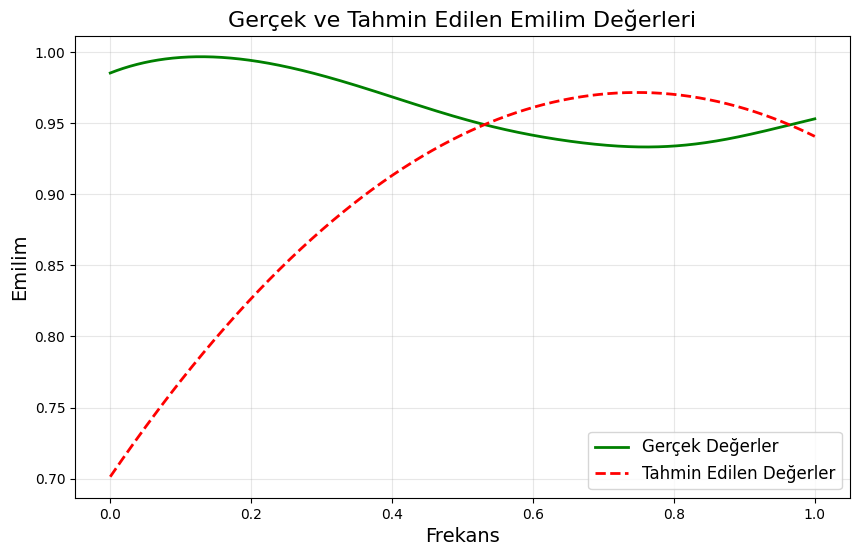

In [83]:
plot_emilim_values(Frenkans_for_only_one_Alfas,true_ValuesForselectedAlfas,val_predictions)

 # boyle yapınca r2 -5 gibi geliyor hresyi oldugu gibi modele traine verme

In [204]:
Train_X = df_train[["Alfas", "Frenkans"]]
Train_Y = df_train["Emilim"]

Test_X = df_test[["Alfas", "Frenkans"]]
Test_Y = df_test["Emilim"]

Val_X = df_val[["Alfas", "Frenkans"]]
Val_Y = df_val["Emilim"]

In [206]:
Val_X.Alfas.unique()

array([1.94, 1.95, 1.96])

In [210]:
polynomial_degree = 3 # 2 veya 3 deneyebilirsiniz
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=polynomial_degree, include_bias=False)),
    ("lin_reg", LinearRegression())
])
model.fit(Train_X,Train_Y)

Pipeline(steps=[('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('lin_reg', LinearRegression())])

In [211]:
new_a = 1.95
filtered_data = df[df["Alfas"] == new_a]
true_ValuesForselectedAlfas=filtered_data["Emilim"]
Frenkans_for_only_one_Alfas = filtered_data["Frenkans"]
lenFrenkans=len(Frenkans_for_only_one_Alfas)
new_frequencies =  Frenkans_for_only_one_Alfas
new_data = pd.DataFrame({'Alfas': [new_a]*lenFrenkans, 'Frenkans': new_frequencies})
val_predictions = model.predict(new_data)

# val_predictions=model.predict(Val_X)

In [212]:
val_mse = mean_squared_error(true_ValuesForselectedAlfas, val_predictions)
val_r2 = r2_score(true_ValuesForselectedAlfas, val_predictions)
print(f"Validation MSE: {val_mse}")
print(f"Validation R2: {val_r2}")

Validation MSE: 0.02366021495008809
Validation R2: -115.8127072230617


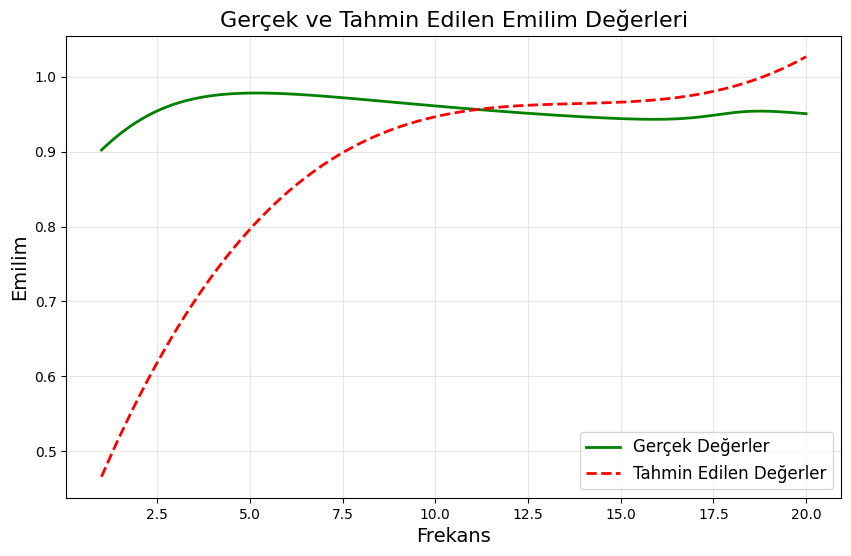

In [213]:
plot_emilim_values(Frenkans_for_only_one_Alfas,true_ValuesForselectedAlfas,val_predictions) #tek deger icin 
# plot_emilim_values(df_val["Frenkans"],Val_Y,val_predictions)